# How to classify MedicalNIST fast?

Quick answer is: Use fast.ai v2

Based on L5

In [1]:
! git clone https://github.com/apolanco3225/Medical-MNIST-Classification.git
! mv Medical-MNIST-Classification/resized/ ./medical_mnist
! rm -rf Medical-MNIST-Classification

Cloning into 'Medical-MNIST-Classification'...
remote: Enumerating objects: 58532, done.
remote: Total 58532 (delta 0), reused 0 (delta 0), pack-reused 58532
Receiving objects: 100% (58532/58532), 77.86 MiB | 3.37 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Checking connectivity... done.
Checking out files: 100% (58959/58959), done.


In [1]:
## run this to install necessary libraries
# !pip install fastai2 torch torchvision

In [2]:
from fastai2.vision.all import *
from utils import *

In [3]:
body_parts = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(64))

In [4]:
dls = body_parts.dataloaders(Path('./medical_mnist'))

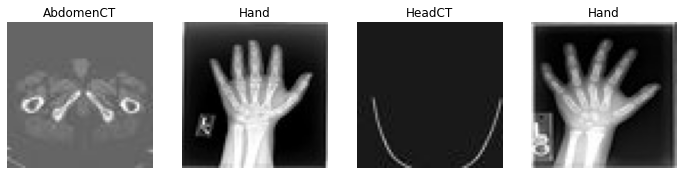

In [5]:
dls.train.show_batch(max_n=4, nrows=1)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [ ]:
%%time
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.031781,0.005356,0.001866,08:43


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()